# 06 Search for insights

In [2]:
from datetime import datetime
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from util import *
from nbeat import *

bnb_data = pd.read_csv('data/BNBUSDT_1D_2.csv')
bnb_close_values = bnb_data['Close']

### Profit of future

```
F(t) = P(t+f) - P(t)
F - future profit
P - price
t - time
f - future period
```

Study the future profit in log scale as the magnitude of it is not important.

```
log_scale(x)
  = log(x + 1)     for possitive x
  = -log(-x + 1)   for negative x
```

One is added to x to keep the log scale positive

In [32]:
def covertToLogScale(data):
  return np.array([np.log(abs(v) + 1)*np.sign(v) for v in data])

def plotBarColoredSign(data):
  colors = ['green' if value > 0 else 'red' for value in data]
  plt.bar(range(len(data)), data, color=colors)

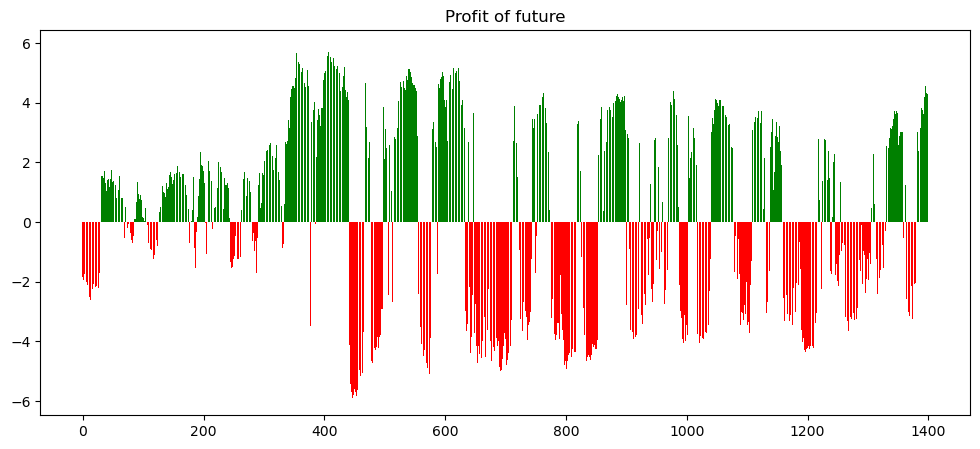

In [ ]:
future_period = 21
profit_of_future = np.array([bnb_close_values[i+future_period] - bnb_close_values[i] for i in range(len(bnb_close_values)-future_period)])

# reduce profit of future in log scale
profit_of_future_log = covertToLogScale(profit_of_future)

plt.figure(figsize=(12, 5))
plotBarColoredSign(profit_of_future_log)
plt.title('Profit of future')
plt.show()